# 캐글 타이타닉 데이터셋 분석

EDA (탐색적 데이터 분석)를 할 때 데이터를 시각화하는 과정은 데이터를 이해하고, 패턴을 찾고, 가설을 세우는 데 매우 중요합니다. 일반적으로 EDA를 진행하면서 데이터를 시각화할 때 사용하는 대표적인 플롯과 그리는 순서를 아래에 정리해보았습니다.

### EDA에서 플롯 그리는 대표적인 순서

1. **데이터의 기본 통계 및 구조 확인**
   - **`df.head()`**, **`df.info()`**, **`df.describe()`**: 데이터의 기본적인 구조와 통계 요약을 확인합니다.
   - **히스토그램**: 각 변수의 분포를 확인하기 위해 사용합니다.
     ```python
     import seaborn as sns
     import matplotlib.pyplot as plt

     sns.histplot(df['column_name'])
     plt.show()
     ```

2. **범주형 변수의 분포 확인**
   - **막대 그래프 (Bar Plot)**: 각 범주형 변수의 빈도를 시각화합니다.
     ```python
     sns.countplot(x='categorical_column', data=df)
     plt.show()
     ```
   - **파이 차트**: 범주형 변수의 비율을 시각화할 때 유용합니다.
     ```python
     df['categorical_column'].value_counts().plot.pie(autopct='%1.1f%%')
     plt.show()
     ```
   - **cat 플롯 (cat Plot)**: 범주형 변수들을 x,y와 hue로 묶어서 교차관계를 확인하기에 좋더라

    '''python
    sns.catplot(x = '범주형' ,  y = '범주형'. hue = '범주형 ')
    '''

3. **연속형 변수의 분포 확인**
   - **히스토그램**: 연속형 변수의 분포를 시각화합니다.
     ```python
     sns.histplot(df['continuous_column'])
     plt.show()
     ```
   - **상자 그림 (Box Plot)**: 데이터의 중앙값, 사분위수, 이상치를 시각화합니다.
     ```python
     sns.boxplot(x='categorical_column', y='continuous_column', data=df)
     plt.show()
     ```

4. **변수 간의 관계 시각화**
   - **산점도 (Scatter Plot)**: 두 연속형 변수 간의 관계를 시각화합니다.
     ```python
     sns.scatterplot(x='continuous_column1', y='continuous_column2', data=df)
     plt.show()
     ```
   - **페어 플롯 (Pair Plot)**: 연속형 변수 간의 쌍별 관계를 시각화합니다.
     ```python
     sns.pairplot(df[['col1', 'col2', 'col3']])
     plt.show()
     ```

5. **범주형 변수와 연속형 변수의 관계 시각화**
   - **상자 그림 (Box Plot)**: 범주형 변수와 연속형 변수 간의 관계를 시각화합니다.
     ```python
     sns.boxplot(x='categorical_column', y='continuous_column', data=df)
     plt.show()
     ```
   - **바이올린 플롯 (Violin Plot)**: 상자 그림과 밀도 곡선을 결합하여 범주형 변수와 연속형 변수 간의 관계를 시각화합니다.
     ```python
     sns.violinplot(x='categorical_column', y='continuous_column', data=df)
     plt.show()
     ```

6. **상관 관계 분석**
   - **상관 행렬 히트맵 (Heatmap)**: 연속형 변수 간의 상관 관계를 시각화합니다.
     ```python
     import seaborn as sns
     import matplotlib.pyplot as plt

     corr = df.corr()
     sns.heatmap(corr, annot=True, cmap='coolwarm')
     plt.show()
     ```

7. **추가적인 시각화**
   - **리니어 리그레션 플롯 (Regression Plot)**: 두 연속형 변수 간의 관계와 추세선을 시각화합니다.
     ```python
     sns.regplot(x='continuous_column1', y='continuous_column2', data=df)
     plt.show()
     ```
   - **선 그래프 (Line Plot)**: 시간에 따른 변화 추세를 시각화할 때 유용합니다.
     ```python
     sns.lineplot(x='time_column', y='value_column', data=df)
     plt.show()
     ```

### EDA 시 주의할 점

1. **데이터 전처리**: EDA를 진행하기 전에 결측값, 이상치 등을 처리해야 합니다.
2. **변수의 타입**: 연속형과 범주형 변수의 구분에 따라 적절한 플롯을 선택해야 합니다.
3. **시각화의 목적**: 데이터를 이해하고 인사이트를 얻기 위한 목적에 따라 적절한 플롯을 선택해야 합니다.

이러한 순서와 방법을 통해 데이터를 시각적으로 탐색하고 이해할 수 있으며, 데이터 분석의 기초를 다질 수 있습니다.

In [771]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')

In [772]:
df = pd.read_csv('./dataset/train.csv')
# df는 train dataset
df_test = pd.read_csv('./dataset/test.csv')

In [773]:
print(df.shape)
print(df_test.shape)

(891, 12)
(418, 11)


+ PassengerId      : 승객 아이디
+ Survived         : 사망 0, 생존 1
+ Pclass           : 1,2,3 등석
+ Name             : 이름
+ Sex              : 성별 남자 0, 여자 1
+ Age              : 나이
+ SibSp            : 동승한 자매/배우자의 수
+ Parch            : 동승한 부모 자식의 수
+ Ticket           : 티켓 번호
+ Fare             : 요금
+ Cabin            : 방 호수
+ Embarked         : 탑승지 c = 셰르부르, q= 퀸즈타운, s= 사우샘프턴

In [774]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [775]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [776]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

+ 각 변수의 결측치 비율

In [777]:
for c in df.columns:
    print(f'{c:<14} : {df[c].isnull().sum() / len(df[c]): .2f} %')

PassengerId    :  0.00 %
Survived       :  0.00 %
Pclass         :  0.00 %
Name           :  0.00 %
Sex            :  0.00 %
Age            :  0.20 %
SibSp          :  0.00 %
Parch          :  0.00 %
Ticket         :  0.00 %
Fare           :  0.00 %
Cabin          :  0.77 %
Embarked       :  0.00 %


# 성별 인코딩

In [778]:
s = {
    'male': 0 , 
    'female' : 1
}
df['Sex'] = df['Sex'].map(s)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


+ 생존자 비율 : 38%
+ 평균 나이   : 29.7세
+ 성별        : 여성 35%, 남성 65%

In [779]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

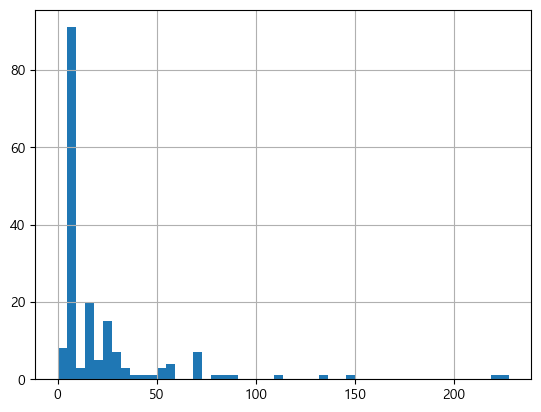

In [780]:
df[df['Age'].isnull()]['Fare'].hist(bins = 50)

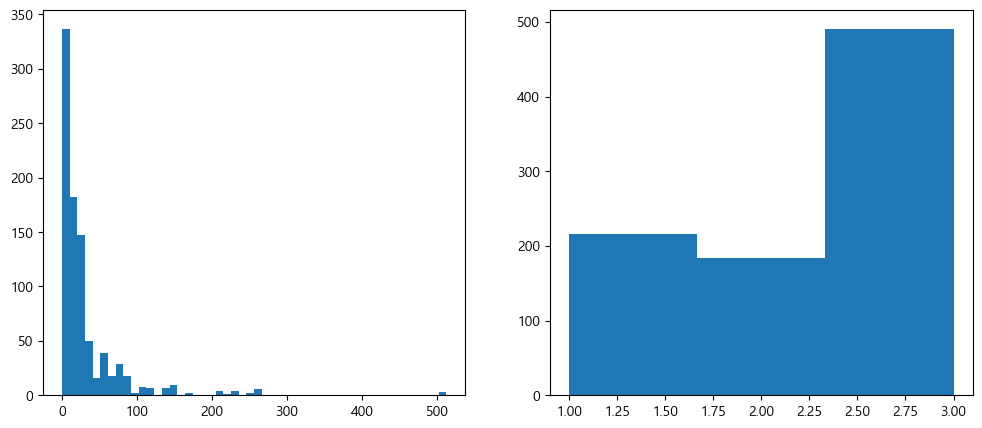

-0.5494996199439082

In [781]:
fig,axes = plt.subplots(1,2,figsize = (12,5))
axes[0].hist(df['Fare'],bins = 50);
axes[1].hist(df['Pclass'],bins = 3);
plt.show()
df['Fare'].corr(
df['Pclass']
)


<Axes: >

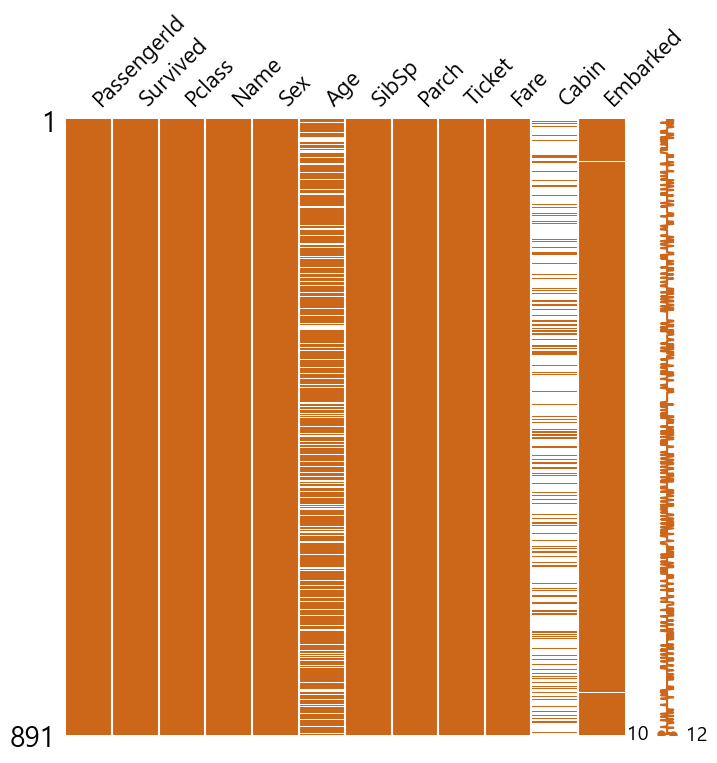

In [782]:
msno.matrix(df, figsize = (8,8), color= (0.8,0.4,0.1))

# 생존자 비율

<BarContainer object of 2 artists>

c:\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


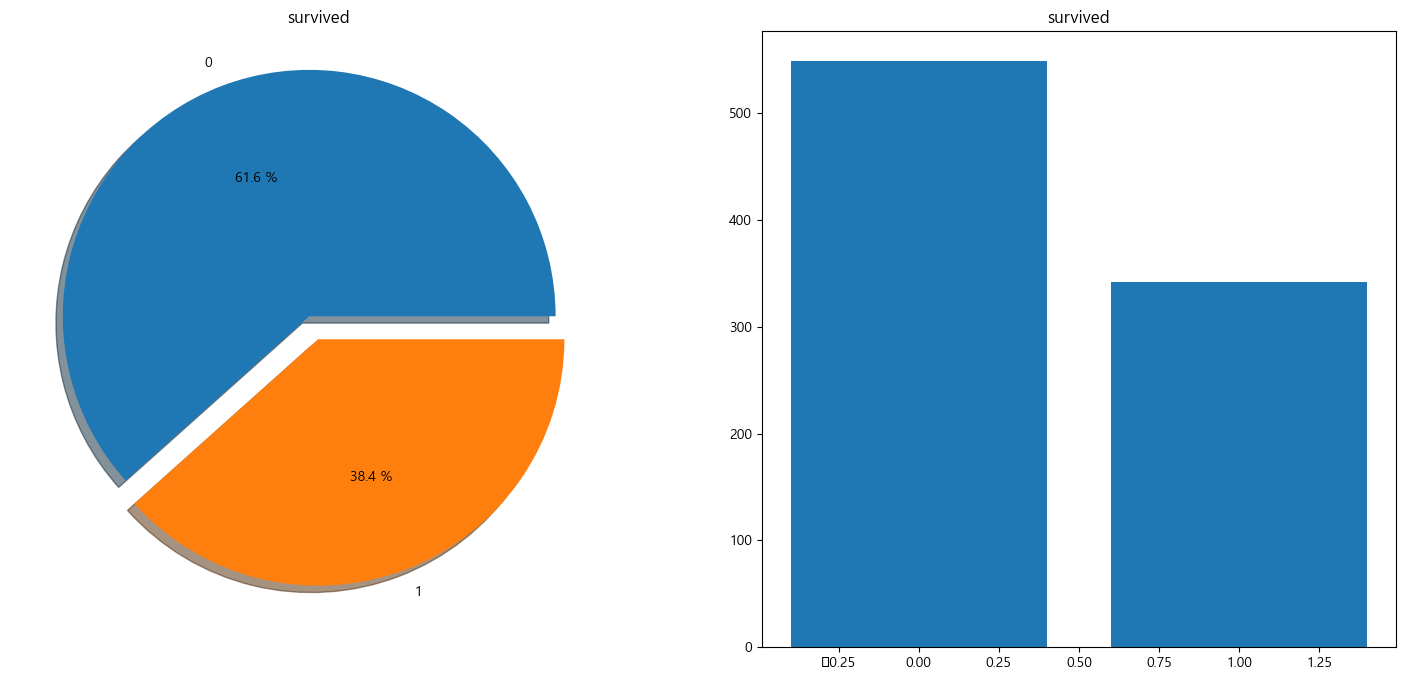

In [783]:
f, axes = plt.subplots(1,2,figsize = (18,8))
axes[0].pie(df['Survived'].value_counts(),labels = ['0', '1'],shadow = True,explode = [0.1,0] ,autopct='%1.1f %%');
axes[0].set_title('survived')
axes[1].set_title('survived')
axes[1].bar(df['Survived'].value_counts().index,df['Survived'].value_counts())

# Pclass -  좋은 자리일 수록 생존률 증가

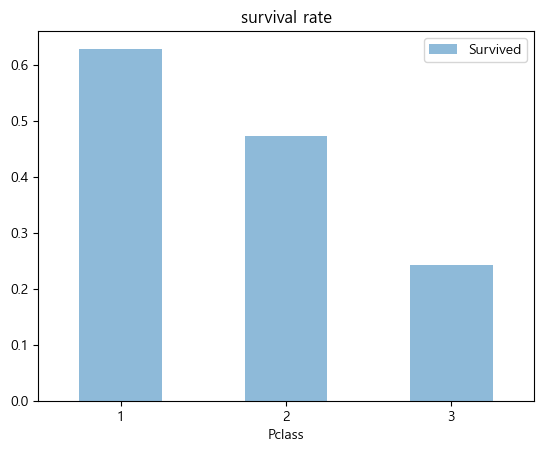

In [784]:
m = df[['Survived',"Pclass"]].groupby(['Pclass']).mean()
m.plot.bar(alpha = 0.5)
plt.xticks(rotation=0);
plt.title('survival rate');

<Axes: xlabel='Pclass', ylabel='count'>

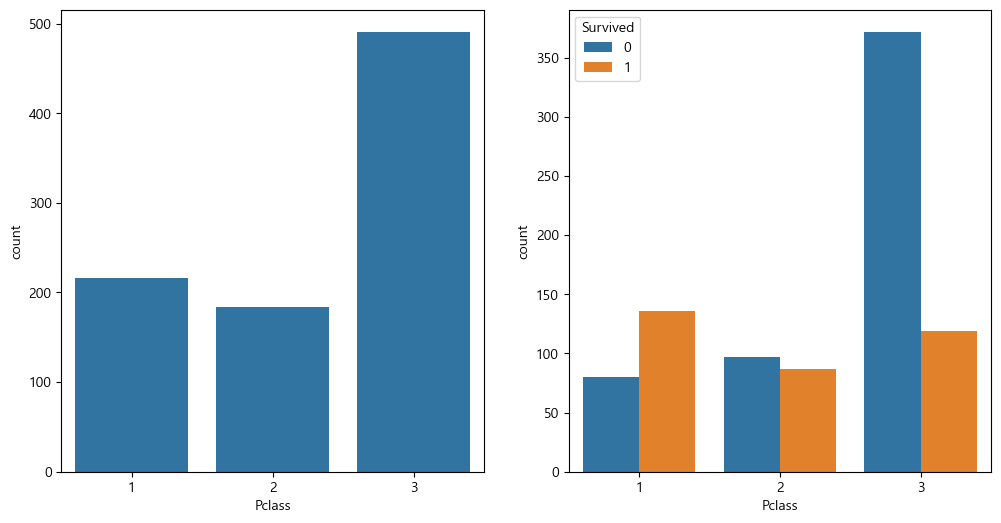

In [785]:
f,a = plt.subplots(1,2,figsize = (12,6))

#m = df.groupby(['Pclass', 'Survived']).size().unstack()
sns.countplot(df,x= 'Pclass', ax = a[0])
#df['Pclass'].value_counts().plot.bar(ax = a[0])
sns.countplot(x='Pclass',hue = 'Survived', data = df,ax = a[1])

<Axes: xlabel='Survived', ylabel='count'>

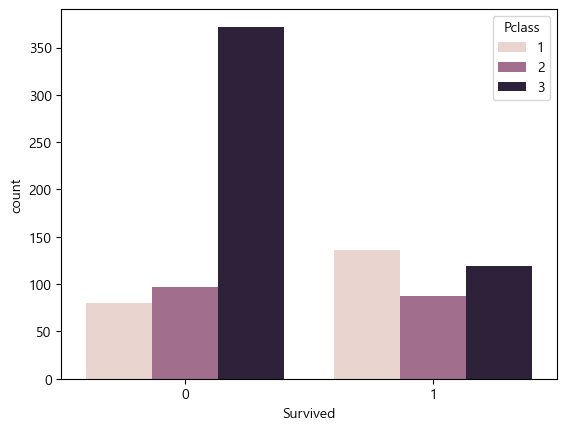

In [786]:
sns.countplot(df,x = 'Survived', hue = 'Pclass')

In [787]:
df[['Survived','Pclass']].groupby(['Pclass']).size()

Pclass
1    216
2    184
3    491
dtype: int64

In [788]:
plt.rcParams['font.family'] = 'Malgun Gothic'

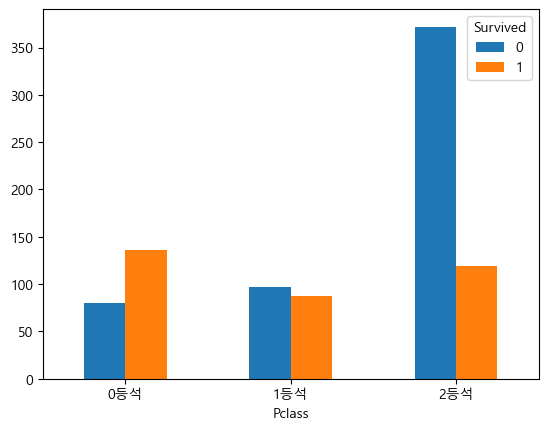

In [789]:
a = df.groupby(['Pclass','Survived']).size().unstack().plot.bar()

plt.xticks(a.get_xticks(),map(lambda x : str(x) + '등석',a.get_xticks()), rotation = 0);


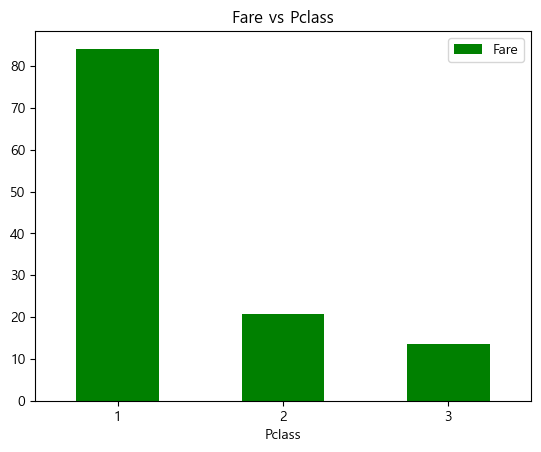

In [790]:
df[['Pclass','Fare']].groupby('Pclass').mean().plot.bar(color = 'g').set_xticklabels([1,2,3],rotation = 0)
plt.title('Fare vs Pclass');

# 성별 - 여성보다 남성이 많고 그 중 남성 사망자가 더 많음

C:\Users\yunji\AppData\Local\Temp\ipykernel_4424\2279404100.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['남자0','여자1'],rotation = 0);


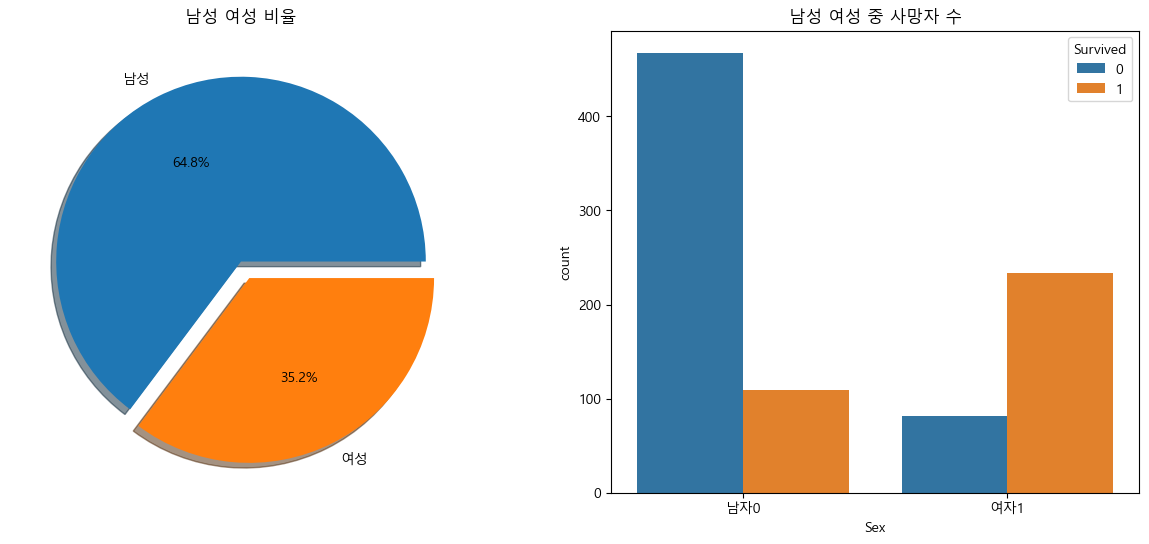

In [791]:
f,ax = plt.subplots(1,2,figsize = (15,6));
df['Sex'].value_counts().plot.pie(autopct = '%.1f%%',ax = ax[0],labels = ['남성','여성'],explode = [0,0.1],shadow = True);
ax[0].set_title('남성 여성 비율');
ax[0].set_ylabel('');
sns.countplot(df,x= 'Sex',hue = 'Survived',ax = ax[1]);
ax[1].set_xticklabels(['남자0','여자1'],rotation = 0);
ax[1].set_title('남성 여성 중 사망자 수');


<Axes: xlabel='Sex'>

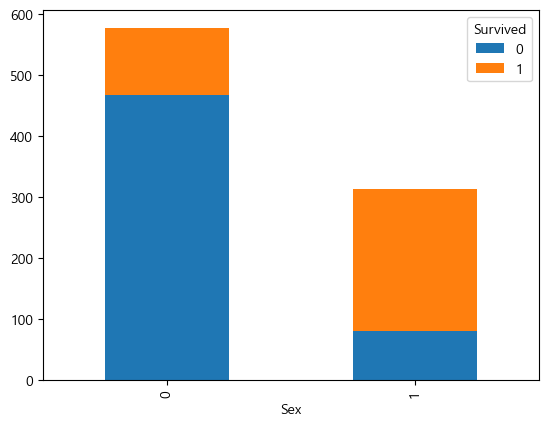

In [792]:
pd.crosstab(df['Sex'],df['Survived']).plot.bar(stacked = True)

In [793]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


c:\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


c:\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


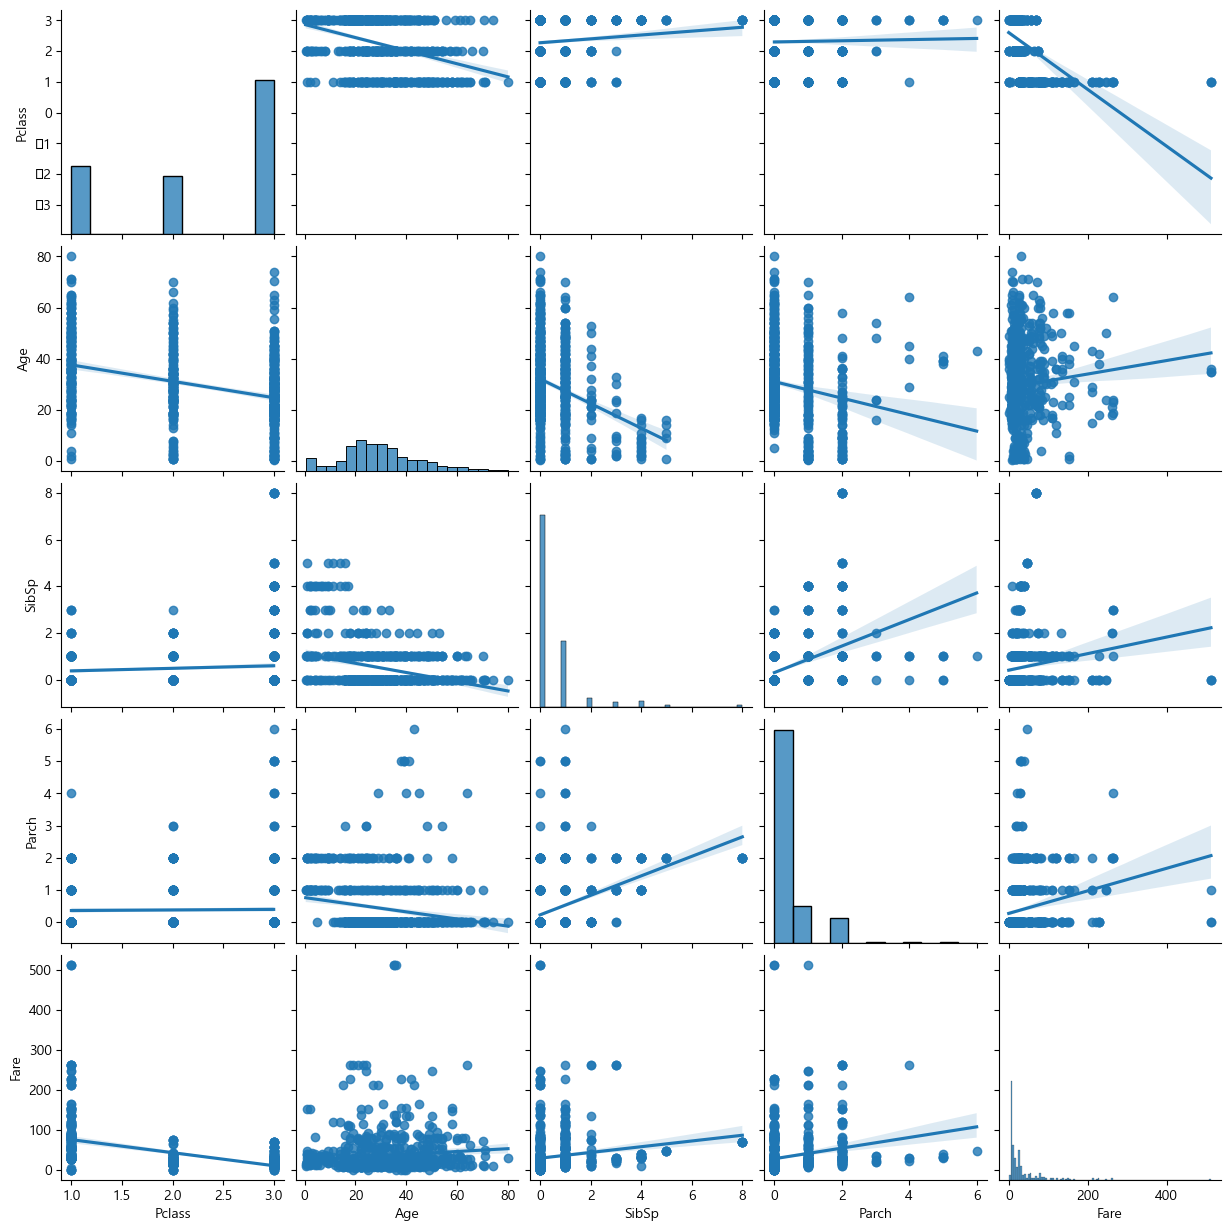

In [794]:
sns.pairplot(df[['Pclass','Age','SibSp','Parch','Fare']],diag_kind = 'hist',kind='reg')

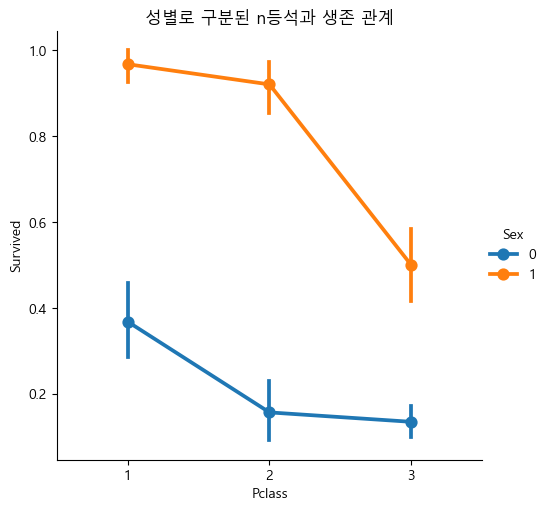

In [795]:
sns.catplot(x='Pclass',y = 'Survived', hue = 'Sex', data=df, kind = 'point')
# ax매개변수 불가
plt.title("성별로 구분된 n등석과 생존 관계");

# Age - # 나이가 적을수록 생존자가 많다.

In [796]:
print(f'가장 높은 나이: {df['Age'].max()}')
print(f'가장 낮은 나이: {df['Age'].min()}')
print(f'탑승객 평균 나이: {df['Age'].mean()}')

가장 높은 나이: 80.0
가장 낮은 나이: 0.42
탑승객 평균 나이: 29.69911764705882


In [797]:
print('결측치 비율 :',df['Age'].isnull().sum()/len(df['Age']))

결측치 비율 : 0.19865319865319866


In [798]:
df[df['Survived'] == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

c:\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


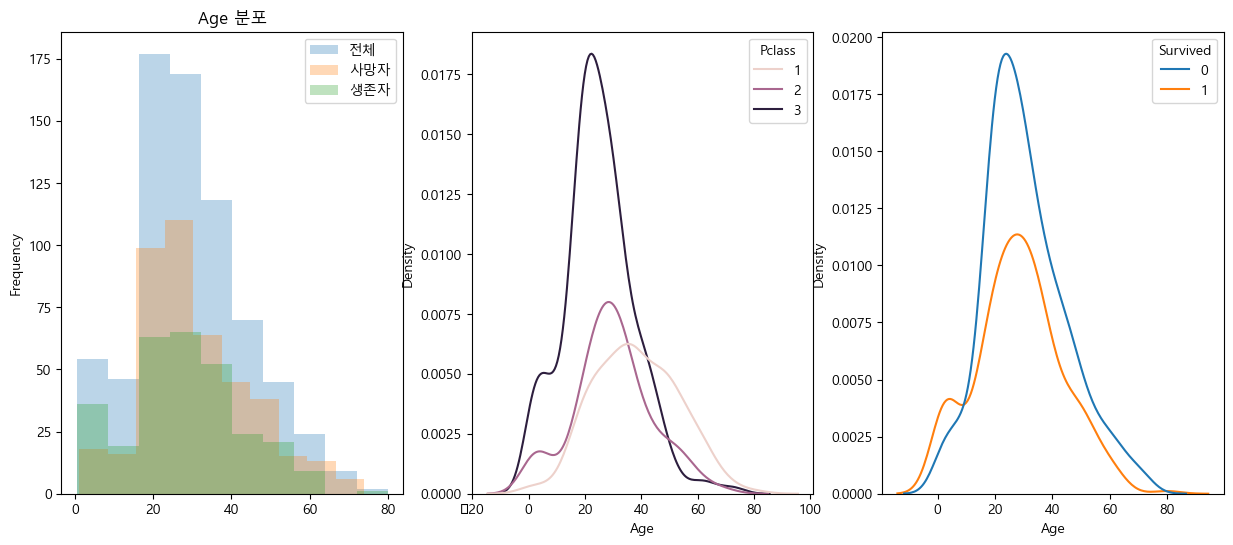

In [799]:
f,a =  plt.subplots(1,3,figsize = (15,6))
df['Age'].plot.hist(bins = 10,ax = a[0],alpha = 0.3,label = '전체')
a[0].set_title('Age 분포')
a[0].hist(df[df['Survived'] == 0]['Age'],alpha = 0.3,label = '사망자')
a[0].hist(df[df['Survived'] == 1]['Age'],alpha = 0.3,label = '생존자')
a[0].legend()

sns.kdeplot(df,x = 'Age',ax = a[1],hue = 'Pclass')
sns.kdeplot(df,x= 'Age',ax = a[2],hue = 'Survived')



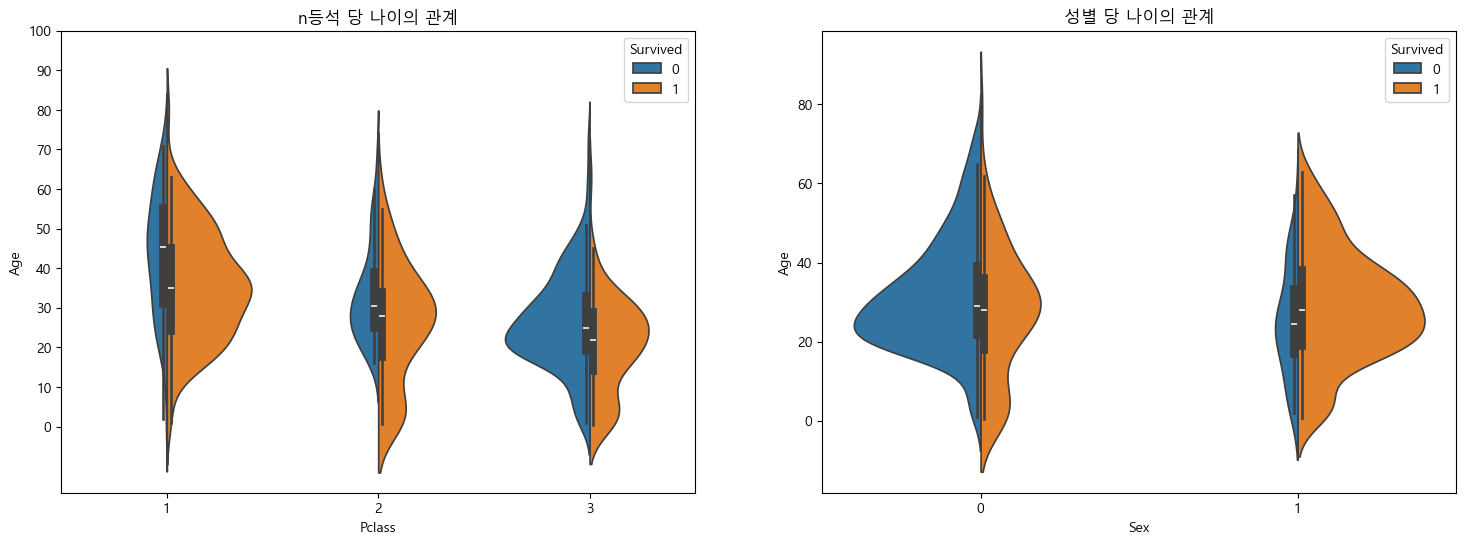

In [800]:
f,a = plt.subplots(1,2,figsize = (18,6))
sns.violinplot(df, x = 'Pclass', y = 'Age' ,hue = 'Survived',split= True ,ax = a[0],density_norm= 'count')
a[0].set_yticks(range(0,110,10))

sns.violinplot(df,x = 'Sex', y = 'Age' , ax = a[1], hue = 'Survived',split = True,density_norm= 'count')
a[0].set_yticks(range(0,110,10));
a[0].set_title("n등석 당 나이의 관계")
a[1].set_title("성별 당 나이의 관계");

# Embarked - C 탑승지가 제일 사망률이 높다.

Axes(0.125,0.153088;0.227941x0.683824)
Axes(0.398529,0.11;0.227941x0.77)
Axes(0.672059,0.11;0.227941x0.77)


C:\Users\yunji\AppData\Local\Temp\ipykernel_4424\2316690237.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[1].set_xticklabels(list('CQS'),rotation = 0)


Text(0.5, 1.0, '탑승지 당 생존자 비율')

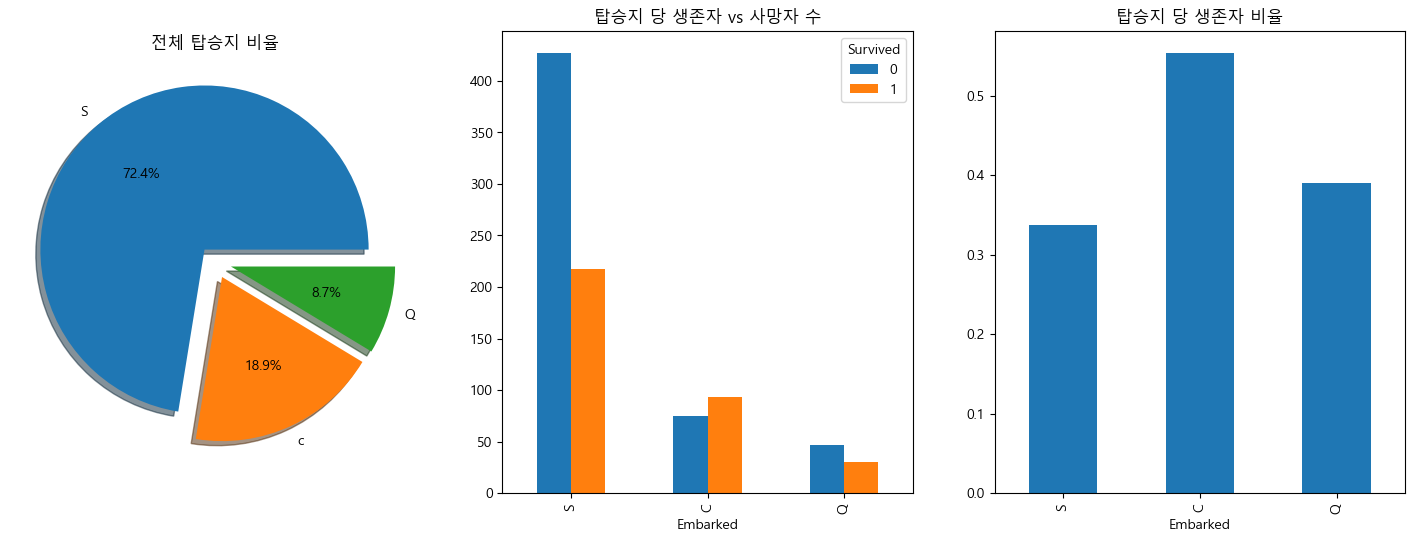

In [801]:
f,a = plt.subplots(1,3,figsize= (18,6))
e = df['Embarked'].value_counts()
a[0].pie(e,autopct ='%.1f%%',labels= ['S','c','Q'],explode = [0.1,0.1,0.1],shadow = True)
a[1].set_xticklabels(list('CQS'),rotation = 0)
(df[df['Survived'] == 1]['Embarked'].value_counts()/df['Embarked'].value_counts()).plot.bar(ax = a[2])
df[['Embarked','Survived']].groupby(['Embarked','Survived'],).size().unstack().loc[['S','C','Q']].plot.bar(ax=  a[1])
for x in f.axes:
    print(x)

a[0].set_title('전체 탑승지 비율')
a[1].set_title('탑승지 당 생존자 vs 사망자 수')
a[2].set_title('탑승지 당 생존자 비율')


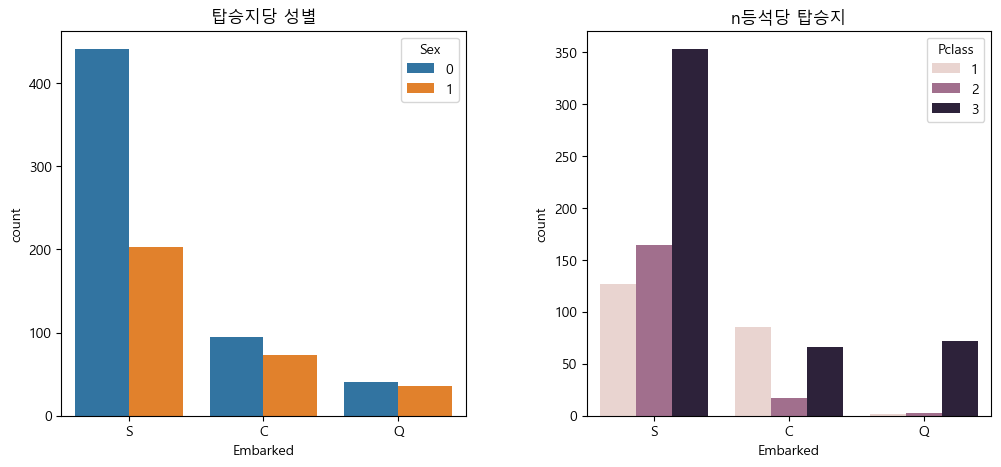

In [802]:
f,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(data = df, x = 'Embarked', hue = 'Sex',ax = ax[0])
sns.countplot(data = df, x = 'Embarked', hue = 'Pclass',ax = ax[1])
ax[0].set_title('탑승지당 성별')
ax[1].set_title('n등석당 탑승지')
f.subplots_adjust(wspace= 0.3)

# FamillySize = SibSp + Parch - 다인가족 사망률 100%, 4,3,2명인 가족 최대 생존률

In [803]:
# 본인까지 더하기
df['FamillySize'] = df['SibSp'] + df['Parch'] + 1

In [804]:
df['FamillySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamillySize, dtype: float64

In [805]:
1 - df[['FamillySize','Survived']].groupby('FamillySize').mean()

,Survived
FamillySize,
1,0.696462
2,0.447205
3,0.421569
4,0.275862
5,0.800000
6,0.863636
7,0.666667
8,1.000000
11,1.000000


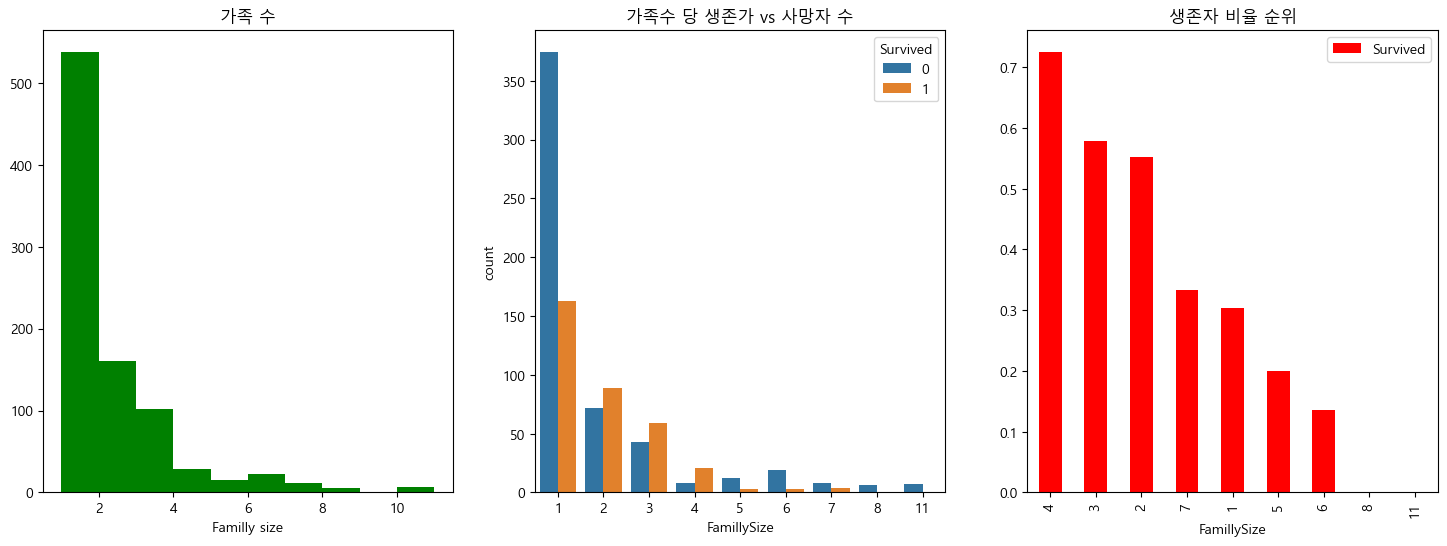

In [806]:
f,ax =  plt.subplots(1,3,figsize = (18,6))

ax[0].hist(df['FamillySize'],color = 'g');
ax[0].set_title('가족 수')
ax[0].set_xlabel('Familly size')

sns.countplot(data = df , x = 'FamillySize', hue = 'Survived', ax = ax[1])
df[['FamillySize','Survived']].groupby('FamillySize').mean().sort_values(ascending= False , by = 'Survived').plot.bar( color = 'red', ax = ax[2])
ax[1].set_title('가족수 당 생존가 vs 사망자 수');
ax[2].set_title('생존자 비율 순위');


In [807]:
df[['FamillySize','Survived']][df['Survived'] == 1].groupby('FamillySize').size()

FamillySize
1    163
2     89
3     59
4     21
5      3
6      3
7      4
dtype: int64

In [808]:
df[['FamillySize','Survived']].groupby('FamillySize').size()

FamillySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
dtype: int64

# Fare, Cabin, Ticket

In [809]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Pclass', ylabel='Fare'>

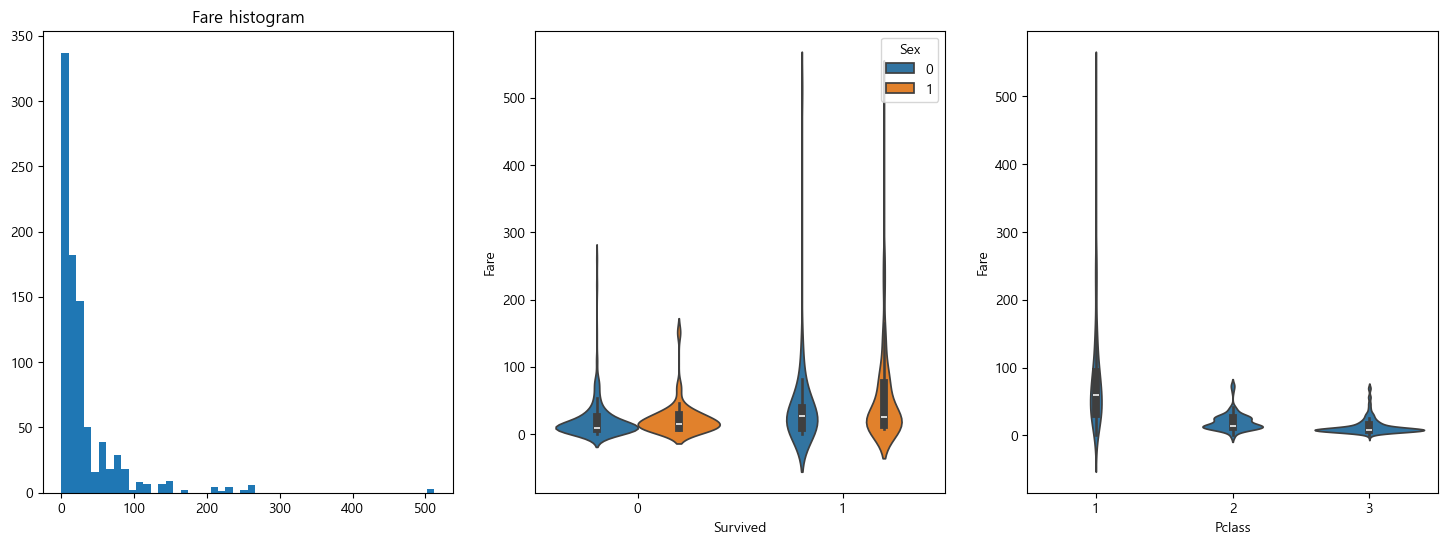

In [810]:
f,a = plt.subplots(1,3,figsize = (18,6))
a[0].hist(df['Fare'],bins = 50 );
a[0].set_title('Fare histogram')

sns.violinplot(data = df, x = 'Survived', y = 'Fare' ,hue = 'Sex', ax = a[1] )
sns.violinplot(data = df, x = 'Pclass', y = 'Fare' , ax = a[2] )
sns.boxplot()

In [811]:

df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [812]:
import re
p = re.compile('[A-Z]')
def change(x):
    if pd.isnull(x):
         return np.nan
    return p.match(x).group()
       
df['Cabin'].map(change).value_counts()


Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [813]:
def mapping(x: str):
    if pd.isnull(x):
        return np.nan
    
    for alpha in 'ABCDEFGHIJKLNMPOQRSTUVWXYZ':
        if alpha in x:
            return alpha
        
df['Floor'] = df['Cabin'].map(mapping)

<Axes: xlabel='Floor'>

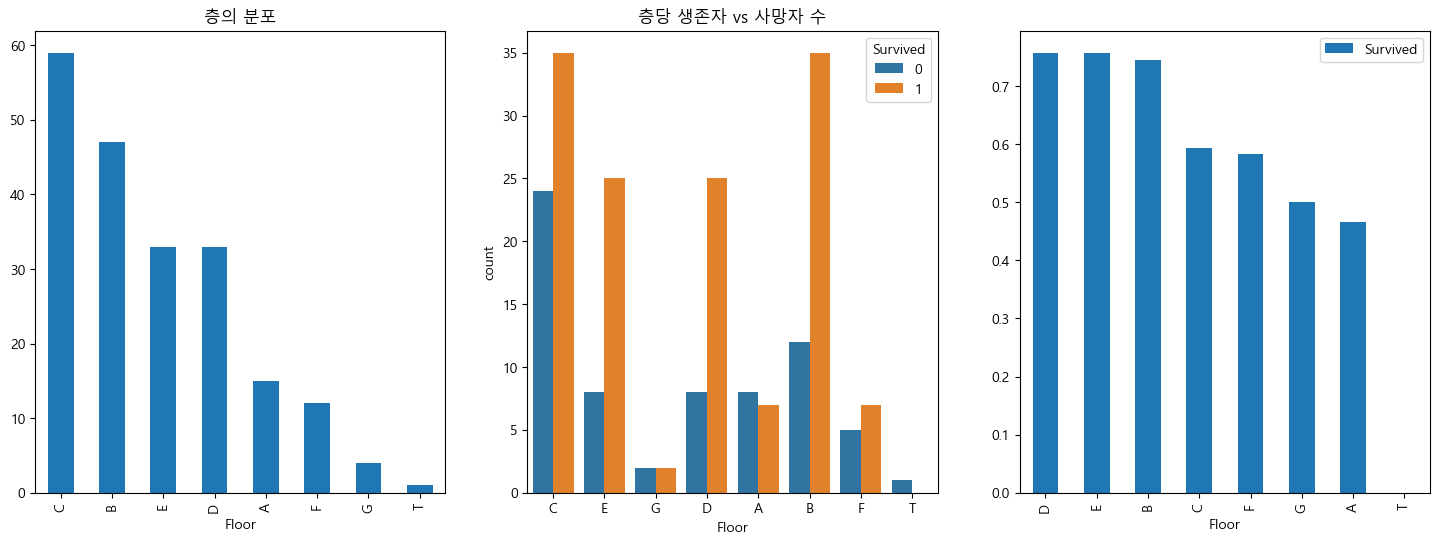

In [814]:
f,a = plt.subplots(1,3,figsize = (18,6))
df['Floor'].value_counts().plot.bar( ax = a[0])
a[0].set_title('층의 분포')
sns.countplot(data = df, x = 'Floor',hue = 'Survived', ax = a[1])
a[1].set_title('층당 생존자 vs 사망자 수')
df[['Floor','Survived']].groupby('Floor').mean().sort_values('Survived',ascending= False).plot.bar(ax = a[2])


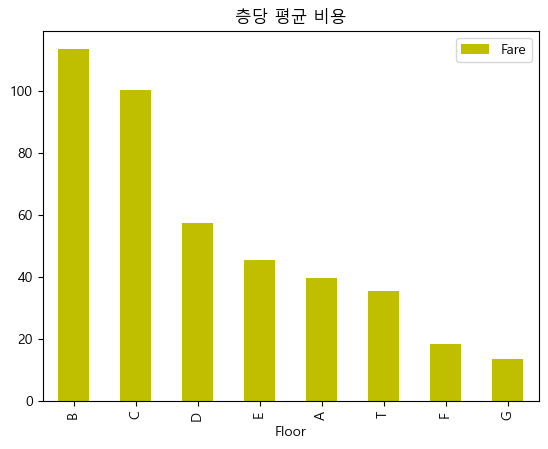

In [815]:
df[['Fare', 'Floor']].groupby('Floor').mean().sort_values('Fare',ascending= False).plot.bar(color = 'y')
plt.title('층당 평균 비용');

# Feature engineering

In [816]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamillySize  891 non-null    int64  
 13  Floor        204 non-null    object 
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


# test set 변경

<Axes: >

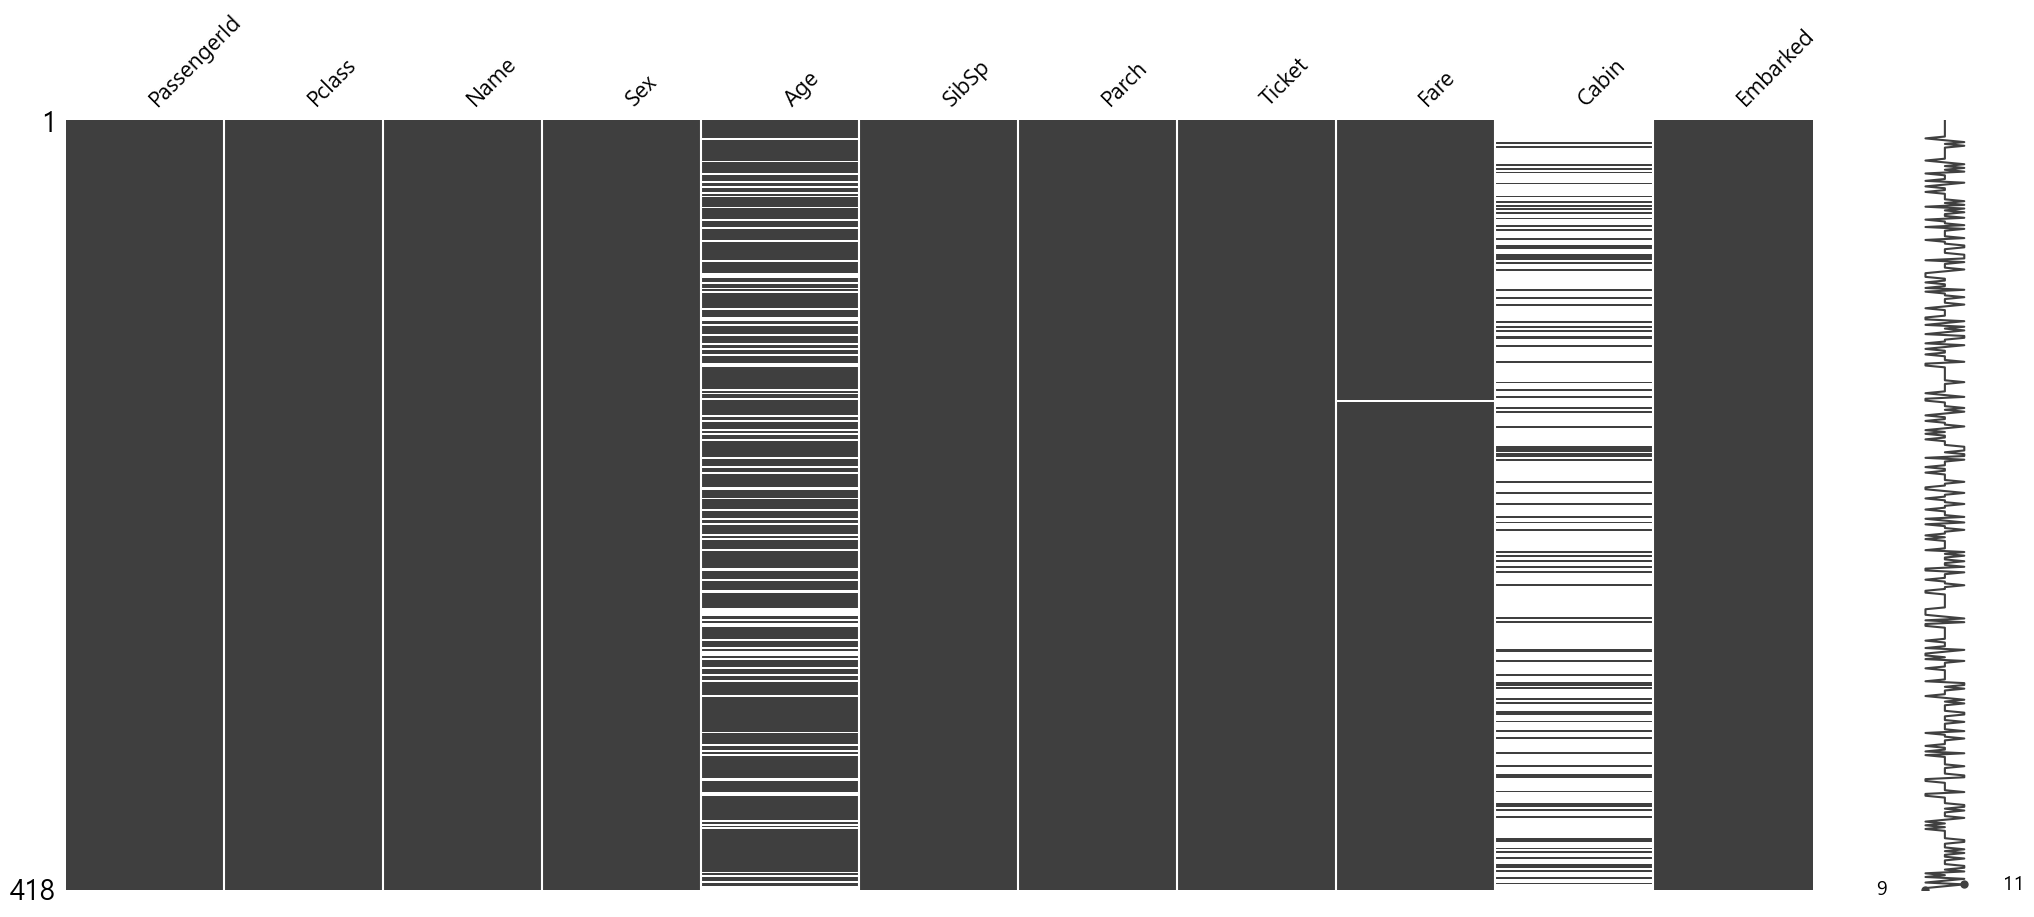

In [817]:
msno.matrix(df_test)

In [818]:
df_test = df_test.dropna(subset= 'Fare')

In [819]:
df['Initial'] = df['Name'].str.extract(r'(\w+)[.]')
df_test['Initial'] = df_test['Name'].str.extract(r'(\w+)[.]')

In [820]:
df_test['FamillySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [821]:
df.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Floor','Name'], axis=1, inplace=True)

In [822]:
df_test.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin','Name'], axis=1, inplace=True)

In [823]:
s1 = set(df_test.columns)
s2 = set(df.columns)
s1 ^ s2

{'Survived'}

# Age는 약 20%가 결측치 -> 이름을 통해 평균대치

In [824]:
pd.set_option('display.max_rows', None)
# p = re.compile("(Mr.|Miss.|Mrs.|Ms.)")
# def nameExtractor(name):
#     if p.search(name):
#         return p.search(name).group()
#     else:
#         return name

df['Initial'].value_counts()

Initial
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [825]:
pd.crosstab(df['Initial'],df['Sex']).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
1,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0


In [826]:
df_test['Initial'].value_counts()

Initial
Mr        239
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [827]:
d = {
    'Capt' : 'Mr',
    'Col': 'Mr',
    'Countess': 'Mrs',
    "Don": "Mr",
    "Dr": "Other",
    "Major": "Mr",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Rev": "Mr",
    'Sir': "Mr",
    'Ms' : "Miss",
    "Jonkheer": "Mr",
    "Lady":"Mrs"
        }
df['Initial'] = df['Initial'].replace(d)
df_test['Initial'] = df_test['Initial'].replace(d)

In [828]:
df['Initial'].value_counts()

Initial
Mr        531
Miss      185
Mrs       128
Master     40
Other       7
Name: count, dtype: int64

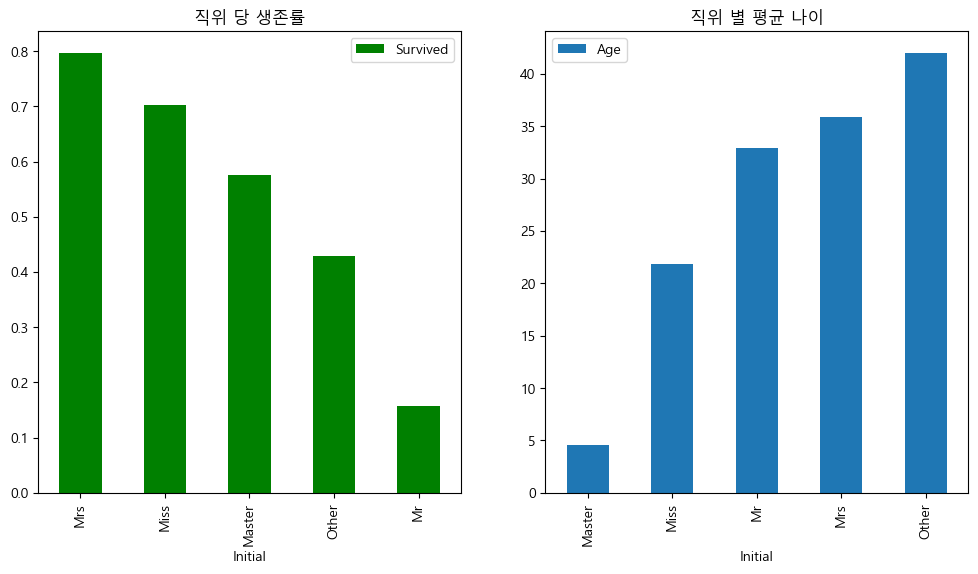

In [829]:
f,a = plt.subplots(1,2,figsize = (12,6))
df[['Survived','Initial']].groupby('Initial').mean().sort_values(by = 'Survived',ascending=False).plot.bar(ax = a[0],color = 'green')
df[['Age','Initial']].groupby('Initial').mean().plot.bar(ax = a[1])
a[0].set_title('직위 당 생존률')
a[1].set_title('직위 별 평균 나이');


In [830]:
Aged = df[['Age','Initial']].groupby('Initial').mean().to_dict()['Age']
Aged

{'Master': 4.574166666666667,
 'Miss': 21.845637583892618,
 'Mr': 32.89199029126213,
 'Mrs': 35.873873873873876,
 'Other': 42.0}

In [831]:
df.loc[df['Age'].isnull(),'Age'] = df.loc[df['Age'].isnull(),'Initial'].map(Aged)

In [832]:
df_test.loc[df_test['Age'].isnull(),'Age'] = df_test.loc[df_test['Age'].isnull(),'Initial'].map(Aged)

In [833]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       2
FamillySize    0
Initial        0
dtype: int64

# Embarked 최빈값 대치

In [835]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamillySize,Initial
61,1,1,1,38.0,113572,80.0,NaN,1,Miss
829,1,1,1,62.0,113572,80.0,NaN,1,Mrs


In [854]:
df.loc[df['Embarked'].isnull(),'Embarked'] = df['Embarked'].mode()[0]

In [856]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
FamillySize    0
Initial        0
dtype: int64

In [858]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      32.891990
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     32.891990
18     31.000000
19     35.873874
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     32.891990
27     19.000000
28     21.845638
29     32.891990
30     40.000000
31     35.873874
32     21.845638
33     66.000000
34     28.000000
35     42.000000
36     32.891990
37     21.000000
38     18.000000
39     14.000000
40     40.000000
41     27.000000
42     32.891990
43      3.000000
44     19.000000
45     32.891990
46     32.891990
47     21.845638
48     32.891990
49     18.000000
50      7.000000
51     21.000000
52     49.000000
53     29.000000
54     65.000000
55     32.891990
56     21.000000
57     28.500000
58      5.0000